## Scikit-learn test-train split

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import the data from the .csv file

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### Plot of TV spend, Radio spend and newspaper against the sales variable to see if a pattern shows up

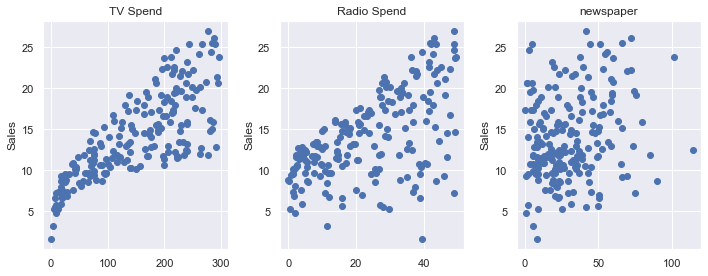

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('newspaper')

plt.tight_layout();

##### Pairplot to see their correlation

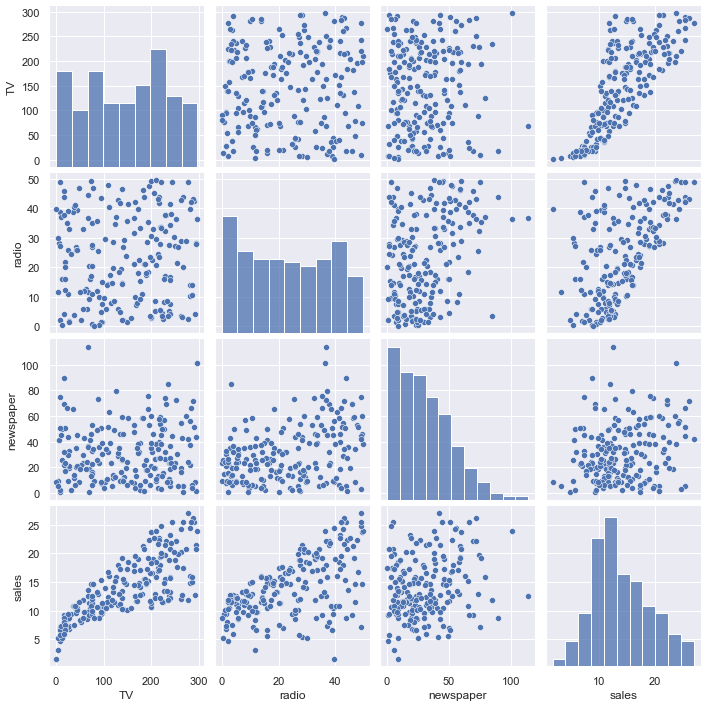

In [9]:
sns.pairplot(df)

### Data manipulation

In [10]:
data = df.copy()

##### Separation between inputs and outputs data

In [13]:
X = data.drop('sales', axis=1)
y = data['sales']

##### Creating the test and train data set based on the input and output variables

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating the model

In [20]:
from sklearn.linear_model import LinearRegression

In [23]:
#help(LinearRegression)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
test_predictions = model.predict(X_test)

### Error calculation

In [29]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
data['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

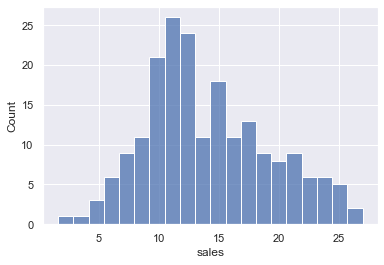

In [33]:
sns.histplot(data['sales'], bins=20)

##### Mean absolute error

In [34]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

##### Root Mean Square Error

In [36]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388